# Ruch pocisku na planetoidzie

## Wprowadzenie
W tym notatniku zajmiemy się symulacją ruchu pocisku na planetoidzie, przy czym:
- Przyspieszenie grawitacyjne nie jest jednorodne (zmienia się wraz z odległością od środka planetoidy).
- Powierzchnia planetoidy może powodować odbicia pocisku.

Rozważamy planetoidę jako ciało kuliste o masie $M$ i promieniu $R$, a pocisk jako punkt materialny o zadanej prędkości początkowej.

## Przyspieszenie grawitacyjne
Zgodnie z prawem powszechnego ciążenia Newtona, przyspieszenie grawitacyjne na odległości $r$ od środka planetoidy wynosi:
$$
\mathbf{g} = - \frac{GM}{r^2} \hat{r},
$$
gdzie $G$ to stała grawitacyjna, a $\hat{r}$ to jednostkowy wektor radialny.

## Możliwe trajektorie
W zależności od wartości początkowej prędkości $\mathbf{v_0}$, pocisk może:
- **Spadać** na powierzchnię planetoidy,
- **Odbijać się** od powierzchni zgodnie z prawem odbicia,
- **Poruszać się po orbicie** wokół planetoidy,
- **Uciekać** w nieskończoność (gdy prędkość przekroczy prędkość ucieczki).

## Ruch pocisku na planetoidzie (kontynuacja)

Aby uzyskać pełną symulację ruchu pocisku, musimy rozważyć kilka scenariuszy zależnych od początkowych warunków (prędkości początkowej i pozycji pocisku) oraz od parametrów planetoidy (masy i promienia).

### Przyspieszenie Grawitacyjne

Zgodnie z prawem powszechnego ciążenia, przyspieszenie grawitacyjne w odległości $r$ od środka planetoidy (dla planetoidy o masie $M$ i promieniu $R$) jest:

$$
\mathbf{g} = - \frac{GM}{r^2} \hat{r}
$$

gdzie:
- $G$ – stała grawitacyjna,
- $M$ – masa planetoidy,
- $r$ – odległość od środka planetoidy,
- $\hat{r}$ – jednostkowy wektor radialny.

W przypadku pocisku poruszającego się w polu grawitacyjnym planetoidy, przyspieszenie na każdej chwili czasu jest zależne od jego odległości od środka planetoidy.

### Równania Ruchu

Równania ruchu pocisku, uwzględniające tylko grawitację, mają postać:

$$
\mathbf{a} = \frac{d\mathbf{v}}{dt} = - \frac{GM}{r^2} \hat{r}
$$

gdzie $\mathbf{a}$ to przyspieszenie pocisku, a $\mathbf{v}$ to jego prędkość.

Równania ruchu są nieliniowe, ponieważ przyspieszenie zależy od $r$, które zmienia się w czasie. Aby uzyskać trajektorie, musimy rozwiązać te równania numerycznie. Będziemy używać metody Rungego-Kutty czwartego rzędu, która jest powszechnie stosowana do numerycznego rozwiązywania równań różniczkowych.

### Warunki Początkowe

Początkowe warunki ruchu pocisku to:
- $\mathbf{r_0} = (x_0, y_0, z_0)$ – początkowa pozycja pocisku,
- $\mathbf{v_0} = (v_{x0}, v_{y0}, v_{z0})$ – początkowa prędkość pocisku.

W zależności od tych warunków pocisk może:
1. **Spadać na powierzchnię planetoidy** – w tym przypadku pocisk porusza się w kierunku środka planetoidy i ostatecznie uderza w powierzchnię.
2. **Odbijać się od powierzchni** – jeśli prędkość pocisku jest wystarczająca, może odbić się od powierzchni planetoidy zgodnie z zasadą odbicia (kąt padania równy kątowi odbicia).
3. **Poruszać się po orbicie wokół planetoidy** – dla odpowiedniej prędkości pocisk może wejść na orbitę wokół planetoidy, co będzie widoczne jako trajektoria eliptyczna lub kołowa.
4. **Uciekać w nieskończoność** – jeśli pocisk ma prędkość większą niż prędkość ucieczki planetoidy, opuści pole grawitacyjne planetoidy.

### Prędkość Ucieczki

Prędkość ucieczki $v_{\text{escape}}$ z planetoidy o masie $M$ i promieniu $R$ jest dana wzorem:

$$
v_{\text{escape}} = \sqrt{\frac{2GM}{R}}
$$

Jeśli pocisk ma początkową prędkość większą niż $v_{\text{escape}}$, ucieknie z planetoidy.

### Interpretacja Wyników

- **Spadanie na powierzchnię planetoidy** – jeśli trajektoria pocisku kończy się, gdy $r \leq R$, oznacza to, że pocisk uderzył w powierzchnię planetoidy.
- **Odbicie** – jeśli pocisk odbija się od powierzchni, to jego prędkość w kierunku radialnym zmienia znak, ale jego prędkość w kierunkach bocznych nie zmienia się znacząco.
- **Poruszanie się po orbicie** – jeśli pocisk porusza się po trajektorii zamkniętej (np. elipsa), to oznacza, że jest na orbicie wokół planetoidy.
- **Ucieczka w nieskończoność** – jeśli pocisk przestaje zmieniać trajektorię po osiągnięciu prędkości ucieczki, to opuszcza pole grawitacyjne planetoidy.

### Podsumowanie

Na podstawie warunków początkowych oraz parametrów planetoidy, pocisk może wylądować na planetoidzie, odbić się od niej, poruszać się po orbicie lub uciec w nieskończoność. Implementacja numeryczna pozwala na symulację tych scenariuszy i analizę trajektorii pocisku.

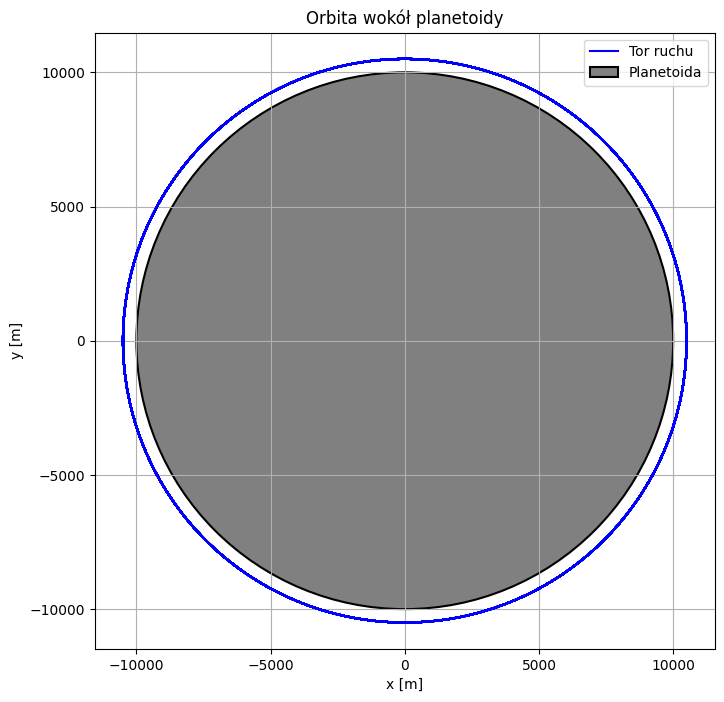

In [5]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.integrate import solve_ivp

G = 6.67430e-11

def equations(t, y, M_p):
    x, y_pos, vx, vy = y
    r = np.sqrt(x**2 + y_pos**2)
    ax = -G * M_p * x / r**3
    ay = -G * M_p * y_pos / r**3
    return [vx, vy, ax, ay]

# Parametry planetoidy
R_p = 1e4       # promień planetoidy [m]
M_p = 1e20      # masa planetoidy [kg]

# Parametry startowe
h = 500         # wysokość nad powierzchnią [m]
r0 = R_p + h    # odległość od środka planetoidy
v_circular = np.sqrt(G * M_p / r0)  # prędkość orbitalna [m/s]

# Prędkość początkowa i kąt
v0 = v_circular
theta_deg = 90  # prostopadle do wektora promienia
theta = np.radians(theta_deg)

# Pozycja startowa i prędkość
x0 = r0
y0 = 0
vx0 = v0 * np.cos(theta)  # w kierunku prostopadłym
vy0 = v0 * np.sin(theta)
y_init = [x0, y0, vx0, vy0]

# Symulacja
t_span = (0, 4000)
t_eval = np.linspace(*t_span, 10000)
sol = solve_ivp(equations, t_span, y_init, args=(M_p,), t_eval=t_eval, rtol=1e-8)

# Wykres
plt.figure(figsize=(8, 8))
plt.plot(sol.y[0], sol.y[1], label='Tor ruchu', color='blue')

# Planetoida
planet = plt.Circle((0, 0), R_p, color='gray', ec='black', lw=1.5, label='Planetoida')
plt.gca().add_patch(planet)

# Proporcje 1:1 – kluczowa linia
plt.axis('equal')  # to wymusza takie same jednostki na osiach

plt.xlabel('x [m]')
plt.ylabel('y [m]')
plt.title('Orbita wokół planetoidy')
plt.grid(True)
plt.legend()
plt.show()


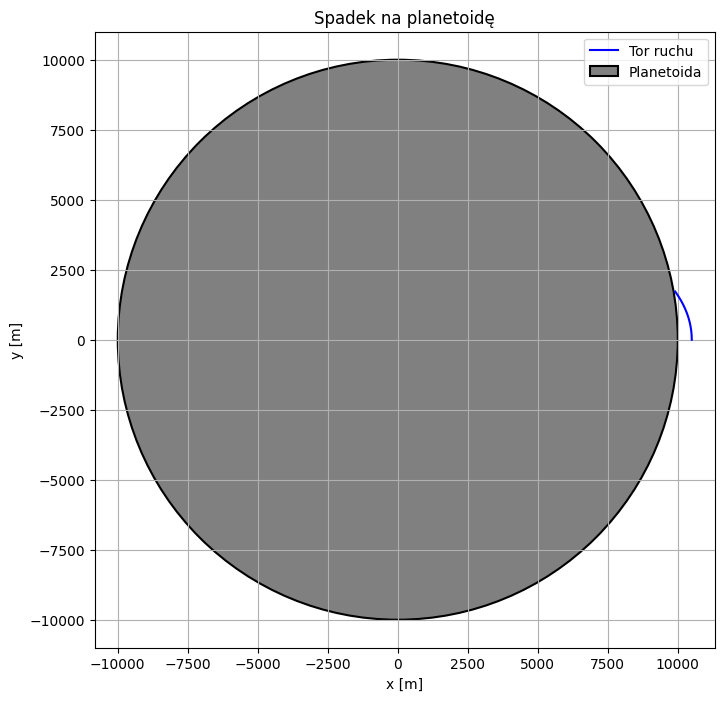

In [9]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.integrate import solve_ivp

G = 6.67430e-11

def equations(t, y, M_p):
    x, y_pos, vx, vy = y
    r = np.sqrt(x**2 + y_pos**2)
    ax = -G * M_p * x / r**3
    ay = -G * M_p * y_pos / r**3
    return [vx, vy, ax, ay]

# Parametry planetoidy
R_p = 1e4
M_p = 1e20

# Parametry początkowe
h = 500
r0 = R_p + h
v_circular = np.sqrt(G * M_p / r0)
v0 = 0.5 * v_circular  # za mała prędkość – spadnie
theta_deg = 90
theta = np.radians(theta_deg)

x0 = r0
y0 = 0
vx0 = v0 * np.cos(theta)
vy0 = v0 * np.sin(theta)
y_init = [x0, y0, vx0, vy0]

# Event: koniec, gdy dotknie planetoidy
def hit_planetoid(t, y, *args):
    r = np.sqrt(y[0]**2 + y[1]**2)
    return r - R_p
hit_planetoid.terminal = True
hit_planetoid.direction = -1

# Symulacja
t_span = (0, 4000)
t_eval = np.linspace(*t_span, 10000)
sol = solve_ivp(equations, t_span, y_init, args=(M_p,), t_eval=t_eval,
                rtol=1e-8, events=hit_planetoid)

# Wykres
plt.figure(figsize=(8, 8))
plt.plot(sol.y[0], sol.y[1], label='Tor ruchu', color='blue')

# Planetoida
planet = plt.Circle((0, 0), R_p, color='gray', ec='black', lw=1.5, label='Planetoida')
plt.gca().add_patch(planet)

plt.axis('equal')
plt.xlabel('x [m]')
plt.ylabel('y [m]')
plt.title('Spadek na planetoidę')
plt.grid(True)
plt.legend()
plt.show()


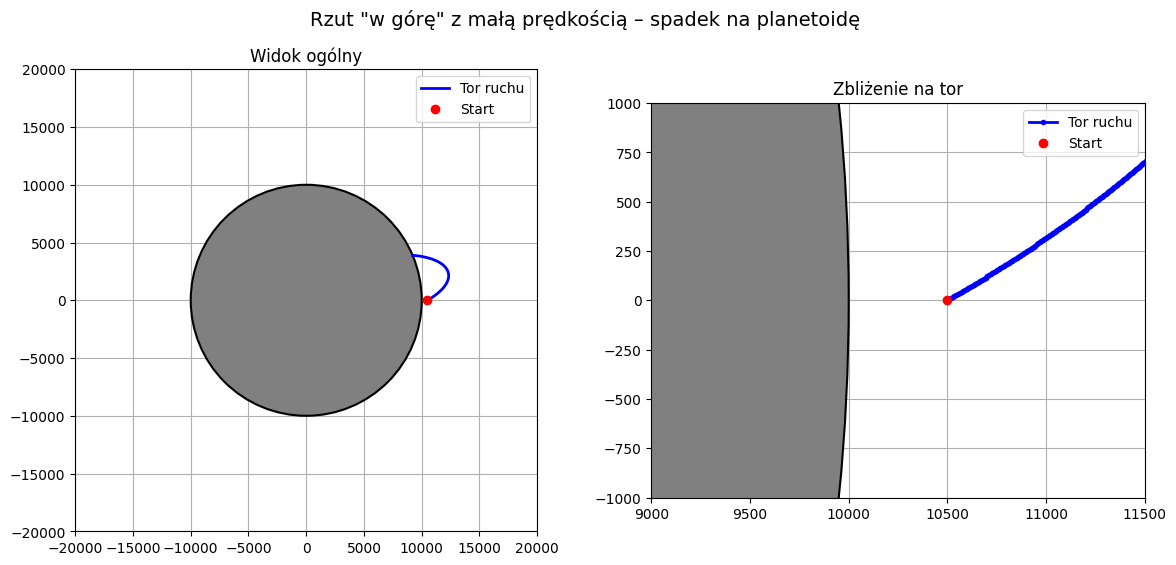

In [11]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.integrate import solve_ivp

G = 6.67430e-11

def equations(t, y, M_p):
    x, y_pos, vx, vy = y
    r = np.sqrt(x**2 + y_pos**2)
    ax = -G * M_p * x / r**3
    ay = -G * M_p * y_pos / r**3
    return [vx, vy, ax, ay]

# Parametry planetoidy
R_p = 1e4       # promień planetoidy [m]
M_p = 1e20      # masa planetoidy [kg]

# Parametry początkowe
h = 500         # wysokość nad powierzchnią [m]
r0 = R_p + h    # 10500 m od środka planetoidy
v0 = 500        # prędkość początkowa [m/s]
normalnykat = 150
theta = np.radians(180-normalnykat)  # rzut "w górę" – skierowany w stronę planetoidy

# Warunki początkowe
x0 = r0
y0 = 0
vx0 = v0 * np.cos(theta)  # przy 180° to -500 m/s
vy0 = v0 * np.sin(theta)  # około 0
y_init = [x0, y0, vx0, vy0]

def hit_planetoid(t, y, *args):
    r = np.sqrt(y[0]**2 + y[1]**2)
    return r - R_p
hit_planetoid.terminal = True
hit_planetoid.direction = -1

t_span = (0, 10000)
# Wywołujemy bez t_eval
sol = solve_ivp(equations, t_span, y_init, args=(M_p,),
                dense_output=True, rtol=1e-8, events=hit_planetoid)

'''print("Liczba punktów symulacji:", len(sol.t))
print("Punkty trajektorii:")
for t_val, x_val, y_val in zip(sol.t, sol.y[0], sol.y[1]):
    print(f"t = {t_val:.2f} s, x = {x_val:.2f} m, y = {y_val:.2f} m")'''

# Przygotowanie gęstego zbioru punktów przy użyciu dense_output (interpolacji)
t_dense = np.linspace(sol.t[0], sol.t[-1], 1000)
y_dense = sol.sol(t_dense)

# Wykres – widok ogólny i zoom
fig, axs = plt.subplots(1, 2, figsize=(14,6))

# Widok ogólny
axs[0].plot(y_dense[0], y_dense[1], label='Tor ruchu', color='blue', lw=2, zorder=3)
axs[0].plot(x0, y0, 'ro', label='Start', markersize=6, zorder=4)
planet1 = plt.Circle((0,0), R_p, color='gray', ec='black', lw=1.5, zorder=2)
axs[0].add_patch(planet1)
axs[0].set_xlim(-2*R_p, 2*R_p)
axs[0].set_ylim(-2*R_p, 2*R_p)
axs[0].set_aspect('equal')
axs[0].set_title('Widok ogólny')
axs[0].grid(True)
axs[0].legend()

# Widok zbliżony na tor
axs[1].plot(y_dense[0], y_dense[1], label='Tor ruchu', color='blue', lw=2, marker='o', markersize=3, zorder=3)
axs[1].plot(x0, y0, 'ro', label='Start', markersize=6, zorder=4)
planet2 = plt.Circle((0,0), R_p, color='gray', ec='black', lw=1.5, zorder=2)
axs[1].add_patch(planet2)
axs[1].set_xlim(R_p - 1000, r0 + 1000)
axs[1].set_ylim(-1000, 1000)
axs[1].set_aspect('equal')
axs[1].set_title('Zbliżenie na tor')
axs[1].grid(True)
axs[1].legend()

plt.suptitle('Rzut "w górę" z małą prędkością – spadek na planetoidę', fontsize=14)
plt.show()


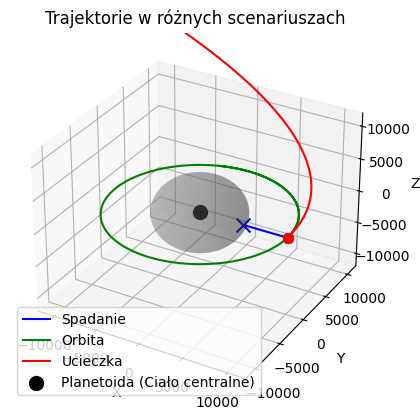

In [8]:
import numpy as np
import matplotlib.pyplot as plt

# Stałe
G = 6.67430e-11  # m^3 kg^-1 s^-2
M = 1e16         # kg – masa planetoidy
R = 5000         # m – promień planetoidy

# Funkcja przyspieszenia grawitacyjnego
def gravity_acceleration(r):
    return -G * M / r**2

# Równania ruchu
def equations(t, state):
    x, y, z, vx, vy, vz = state
    r = np.sqrt(x**2 + y**2 + z**2)
    ax = gravity_acceleration(r) * x / r
    ay = gravity_acceleration(r) * y / r
    az = gravity_acceleration(r) * z / r
    return [vx, vy, vz, ax, ay, az]

# Metoda Rungego-Kutty 4-tego rzędu z detekcją kolizji (spadanie)
def runge_kutta(func, state0, t0, tf, dt):
    steps = int((tf - t0) / dt)
    state = np.array(state0, dtype=float)
    times = np.linspace(t0, tf, steps)
    trajectory = np.zeros((steps, 6))
    trajectory[0] = state

    for i in range(1, steps):
        k1 = np.array(func(times[i-1], state))
        k2 = np.array(func(times[i-1] + dt/2, state + dt/2 * k1))
        k3 = np.array(func(times[i-1] + dt/2, state + dt/2 * k2))
        k4 = np.array(func(times[i-1] + dt, state + dt * k3))
        state = state + dt/6 * (k1 + 2*k2 + 2*k3 + k4)

        # Detekcja kolizji z planetoidą – obiekt spada na powierzchnię
        r = np.linalg.norm(state[:3])
        if r < R:
            # Ustawiamy prędkość na zero (spadanie)
            state[3:] = [0, 0, 0]
            # Ustawiamy pozycję na powierzchni planetoidy
            state[:3] = np.array([R, 0, 0])  # Pozycja na powierzchni, np. na osi X

        trajectory[i] = state

    return times, trajectory

# Warunki początkowe dla trzech scenariuszy

# 1. Spadanie w kierunku planetoidy (prędkość skierowana do środka)
r0_1 = [10000, 0, 0]   # Pozycja 10 km od środka planetoidy
v0_1 = [-200, 0, 0]     # Prędkość 200 m/s skierowana do środka (ujemny x)
state0_1 = r0_1 + v0_1

# 2. Orbita – prędkość orbitalna (do obiektu poruszającego się po stabilnej orbicie)
r0_2 = [10000, 0, 0]   # Pozycja 10 km od środka planetoidy
v_orbit = np.sqrt(G * M / 10000)  # Prędkość orbitalna (m/s)
v0_2 = [0, v_orbit, 0]  # Prędkość skierowana prostopadle do promienia
state0_2 = r0_2 + v0_2

# 3. Ucieczka – prędkość równa prędkości ucieczki (lub większa)
r0_3 = [10000, 0, 0]   # Pozycja 10 km od środka planetoidy
v_escape = np.sqrt(2 * G * M / 10000)  # Prędkość ucieczki (m/s)
v0_3 = [0, v_escape, 0]  # Prędkość skierowana prostopadle do promienia
state0_3 = r0_3 + v0_3

# Parametry symulacji
t0 = 0       # czas początkowy
tf = 10000   # czas końcowy (s)
dt = 1       # krok czasowy (s)

# Symulacje dla 3 scenariuszy
times_1, traj_1 = runge_kutta(equations, state0_1, t0, tf, dt)
times_2, traj_2 = runge_kutta(equations, state0_2, t0, tf, dt)
times_3, traj_3 = runge_kutta(equations, state0_3, t0, tf, dt)

# Wizualizacja trajektorii
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')

# Trajektoria dla spadania
ax.plot(traj_1[:, 0], traj_1[:, 1], traj_1[:, 2], label="Spadanie", color='blue')
# Trajektoria dla orbity
ax.plot(traj_2[:, 0], traj_2[:, 1], traj_2[:, 2], label="Orbita", color='green')
# Trajektoria dla ucieczki
ax.plot(traj_3[:, 0], traj_3[:, 1], traj_3[:, 2], label="Ucieczka", color='red')

# Reprezentacja planetoidy (ciało centralne)
ax.scatter(0, 0, 0, color='black', s=100, label="Planetoida (Ciało centralne)")

# Zaznaczenie początkowych pozycji obiektów (bez dodawania do legendy)
ax.scatter(r0_1[0], r0_1[1], r0_1[2], color='blue', s=50, marker='o')
ax.scatter(r0_2[0], r0_2[1], r0_2[2], color='green', s=50, marker='o')
ax.scatter(r0_3[0], r0_3[1], r0_3[2], color='red', s=50, marker='o')

# Ustawienie równych skal na osiach
ax.set_xlim([-12000, 12000])
ax.set_ylim([-12000, 12000])
ax.set_zlim([-12000, 12000])
ax.set_xlabel('X')
ax.set_ylabel('Y')
ax.set_zlabel('Z')
ax.set_title('Trajektorie w różnych scenariuszach')

ax.legend()

u, v = np.mgrid[0:2*np.pi:50j, 0:np.pi:25j]
x_sphere = R * np.cos(u) * np.sin(v)
y_sphere = R * np.sin(u) * np.sin(v)
z_sphere = R * np.cos(v)
ax.plot_surface(x_sphere, y_sphere, z_sphere, color='gray', alpha=0.3, edgecolor='none')

# Zaznaczenie końcowego punktu spadku
end_index = np.where(np.linalg.norm(traj_1[:, :3], axis=1) <= R + 1)[0]
if len(end_index) > 0:
    ax.scatter(traj_1[end_index[0], 0], traj_1[end_index[0], 1], traj_1[end_index[0], 2],
               color='blue', marker='x', s=100, label="Miejsce uderzenia")

plt.show()


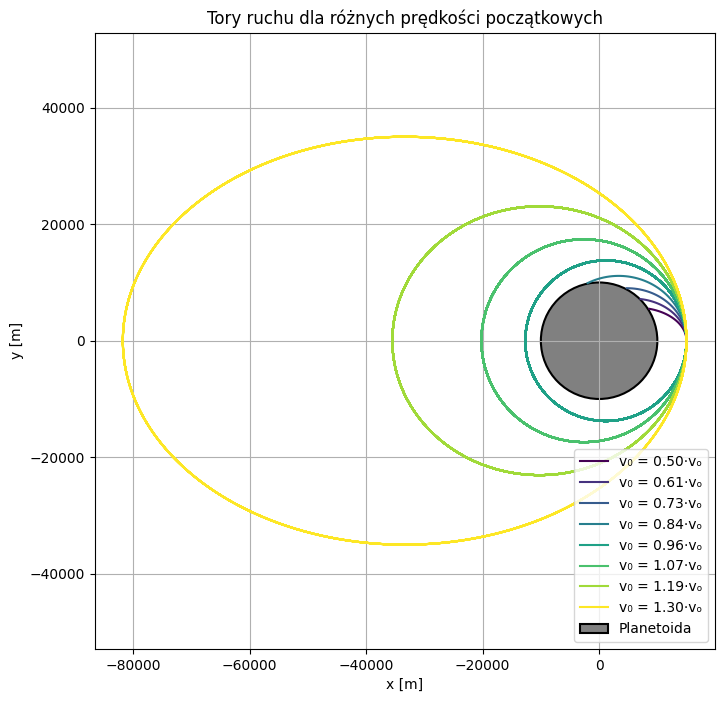

In [6]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.integrate import solve_ivp

G = 6.67430e-11

def equations(t, y, M_p):
    x, y_pos, vx, vy = y
    r = np.sqrt(x**2 + y_pos**2)
    ax = -G * M_p * x / r**3
    ay = -G * M_p * y_pos / r**3
    return [vx, vy, ax, ay]

# Parametry planetoidy
R_p = 1e4  # promień planetoidy
M_p = 1e20  # masa planetoidy

# Parametry początkowe
h = 5000  # wysokość nad powierzchnią
r0 = R_p + h
theta_deg = 90
theta = np.radians(theta_deg)

# Prędkości od 0.5 do 1.5 * v_orbital
v_circular = np.sqrt(G * M_p / r0)
v_escape = np.sqrt(2) * v_circular
velocity_factors = np.linspace(0.5, 1.30, 8)  # 8 trajektorii

colors = plt.cm.viridis(np.linspace(0, 1, len(velocity_factors)))

plt.figure(figsize=(8, 8))

for i, factor in enumerate(velocity_factors):
    v0 = factor * v_circular
    vx0 = v0 * np.cos(theta)
    vy0 = v0 * np.sin(theta)
    y_init = [r0, 0, vx0, vy0]

    # Event końca symulacji
    def hit_planetoid(t, y, *args):
        r = np.sqrt(y[0]**2 + y[1]**2)
        return r - R_p
    hit_planetoid.terminal = True
    hit_planetoid.direction = -1

    # Symulacja
    t_span = (0, 6000)
    t_eval = np.linspace(*t_span, 10000)
    sol = solve_ivp(equations, t_span, y_init, args=(M_p,), t_eval=t_eval,
                    rtol=1e-8, events=hit_planetoid)

    label = f"v₀ = {factor:.2f}·vₒ"
    plt.plot(sol.y[0], sol.y[1], label=label, color=colors[i])

# Planetoida
planet = plt.Circle((0, 0), R_p, color='gray', ec='black', lw=1.5, label='Planetoida')
plt.gca().add_patch(planet)

plt.axis('equal')
plt.xlabel('x [m]')
plt.ylabel('y [m]')
plt.title('Tory ruchu dla różnych prędkości początkowych')
plt.grid(True)
plt.legend()
plt.show()


In [7]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.integrate import solve_ivp
from matplotlib.animation import FuncAnimation
from IPython.display import HTML

G = 6.67430e-11

def equations(t, y, M_p):
    x, y_pos, vx, vy = y
    r = np.sqrt(x**2 + y_pos**2)
    ax = -G * M_p * x / r**3
    ay = -G * M_p * y_pos / r**3
    return [vx, vy, ax, ay]

# Parametry planetoidy
R_p = 1e4  # promień planetoidy
M_p = 1e20  # masa planetoidy

# Parametry początkowe
h = 5000  # wysokość nad powierzchnią
r0 = R_p + h
theta = np.radians(90)

# Prędkość orbitalna
v_circular = np.sqrt(G * M_p / r0)

# 4 wartości: mniejsze i równe v_circular
velocity_factors = [0.5, 0.7, 0.89, 1.0]
colors = ['red', 'orange', 'green', 'blue']

# Przygotowanie danych dla każdej trajektorii
solutions = []
max_points = 0

for i, factor in enumerate(velocity_factors):
    v0 = factor * v_circular
    vx0 = v0 * np.cos(theta)
    vy0 = v0 * np.sin(theta)
    y_init = [r0, 0, vx0, vy0]

    def hit_planetoid(t, y, *args):
        r = np.sqrt(y[0]**2 + y[1]**2)
        return r - R_p
    hit_planetoid.terminal = True
    hit_planetoid.direction = -1

    t_span = (0, 10000)
    t_eval = np.linspace(*t_span, 10000)
    sol = solve_ivp(equations, t_span, y_init, args=(M_p,), t_eval=t_eval,
                    rtol=1e-8, events=hit_planetoid)

    solutions.append(sol)
    if len(sol.y[0]) > max_points:
        max_points = len(sol.y[0])

# Przygotowanie wykresu
fig, ax = plt.subplots(figsize=(8, 8))
ax.set_xlim(-1.5*r0, 1.5*r0)
ax.set_ylim(-1.5*r0, 1.5*r0)
ax.set_xlabel('x [m]')
ax.set_ylabel('y [m]')
ax.set_title('Animacja ruchu dla różnych prędkości początkowych')
ax.grid(True)

# Planetoida
planet = plt.Circle((0, 0), R_p, color='gray', ec='black', lw=1.5, label='Planetoida')
ax.add_patch(planet)

# Inicjalizacja elementów animacji
points = []
lines = []
for i, factor in enumerate(velocity_factors):
    line, = ax.plot([], [], color=colors[i], alpha=0.5,
                    label=f"v₀ = {factor:.2f}·vₒ")
    point, = ax.plot([], [], 'o', color=colors[i], markersize=8)
    lines.append(line)
    points.append(point)

# Legenda
ax.legend()

# Funkcja inicjalizująca
def init():
    for line, point in zip(lines, points):
        line.set_data([], [])
        point.set_data([], [])
    return lines + points

# Funkcja animacji
def animate(i):
    for j, sol in enumerate(solutions):
        if len(sol.y[0]) == 0:
            continue

        idx = min(i, len(sol.y[0]) - 1)
        idx = max(0, idx)

        # Zmiana: przekazujemy współrzędne jako listy
        x_point = [sol.y[0][idx]]  # <- Otaczamy skalar listą
        y_point = [sol.y[1][idx]]  # <- Otaczamy skalar listą

        # Aktualizacja danych
        lines[j].set_data(sol.y[0][:idx+1].tolist(), sol.y[1][:idx+1].tolist())
        points[j].set_data(x_point, y_point)  # <- Teraz przekazujemy sekwencje

    return lines + points

# Utwórz animację
frames = min(200, max_points)  # Ogranicz liczbę klatek dla wydajności
anim = FuncAnimation(fig, animate, frames=frames, init_func=init,
                     interval=50, blit=True)

# Wyświetl animację w Colab
plt.close(fig)  # Zapobiega podwójnemu wyświetlaniu
HTML(anim.to_jshtml())

Output hidden; open in https://colab.research.google.com to view.